In [ ]:
# !pip install -U torch transformers sentence-transformers

In [ ]:
# # Installation for GPU llama-cpp-python
# !CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28  --force-reinstall --upgrade --no-cache-dir -q 2>/dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 107.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 285.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 232.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 304.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 294.4 MB/s eta 0:00:00


In [ ]:
# !pip install tiktoken pypdf langchain langchain-community chromadb sentence-transformers huggingface_hub


In [ ]:
import json
import tiktoken
import pandas as pd
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFDirectoryLoader, PyPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma
from google.colab import userdata, drive

In [ ]:
pdf_loader=PyPDFLoader('/content/HBR_How_Apple_Is_Organized_For_Innovation-4 (2).pdf')

In [ ]:
content=pdf_loader.load()

In [ ]:
for i in range(5):
  print("Page Number:",{i+1},end='\n')
  print(content[i])

Page Number: {1}
page_content='REPRINT R2006F
PUBLISHED IN HBR
NOVEMBER–DECEMBER 2020
ARTICLEORGANIZATIONAL CULTURE
How Apple Is 
Organized  
for Innovation
It’s about experts leading experts. 
by Joel M. Podolny and Morten T. Hansen
This article is made available to you with compliments of Apple Inc for your personal use. Further posting, copying or distribution is not permitted.' metadata={'producer': 'Adobe PDF Library 15.0 (via http://bfo.com/products/pdf?version=2.23.5-r33279)', 'creator': 'Adobe InDesign 14.0 (Macintosh)', 'creationdate': '2020-10-05T14:18:42-04:00', 'moddate': '2020-12-01T18:37:49+00:00', 'trapped': '/False', 'source': '/content/HBR_How_Apple_Is_Organized_For_Innovation-4 (2).pdf', 'total_pages': 11, 'page': 0, 'page_label': '1'}
Page Number: {2}
page_content='2
Harvard Business Review
November–December 2020
This article is made available to you with compliments of Apple Inc for your personal use. Further posting, copying or distribution is not permitted.' metad

##Chunking

In [ ]:
text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=512,
    chunk_overlap=20
)

In [ ]:
text_chunks=text_splitter.split_documents(documents=content)
print(len(text_chunks))

25


In [ ]:
print(text_chunks[0])

page_content='REPRINT R2006F
PUBLISHED IN HBR
NOVEMBER–DECEMBER 2020
ARTICLEORGANIZATIONAL CULTURE
How Apple Is 
Organized  
for Innovation
It’s about experts leading experts. 
by Joel M. Podolny and Morten T. Hansen
This article is made available to you with compliments of Apple Inc for your personal use. Further posting, copying or distribution is not permitted.' metadata={'producer': 'Adobe PDF Library 15.0 (via http://bfo.com/products/pdf?version=2.23.5-r33279)', 'creator': 'Adobe InDesign 14.0 (Macintosh)', 'creationdate': '2020-10-05T14:18:42-04:00', 'moddate': '2020-12-01T18:37:49+00:00', 'trapped': '/False', 'source': '/content/HBR_How_Apple_Is_Organized_For_Innovation-4 (2).pdf', 'total_pages': 11, 'page': 0, 'page_label': '1'}


In [ ]:
print(text_chunks[1])

page_content='2
Harvard Business Review
November–December 2020
This article is made available to you with compliments of Apple Inc for your personal use. Further posting, copying or distribution is not permitted.' metadata={'producer': 'Adobe PDF Library 15.0 (via http://bfo.com/products/pdf?version=2.23.5-r33279)', 'creator': 'Adobe InDesign 14.0 (Macintosh)', 'creationdate': '2020-10-05T14:18:42-04:00', 'moddate': '2020-12-01T18:37:49+00:00', 'trapped': '/False', 'source': '/content/HBR_How_Apple_Is_Organized_For_Innovation-4 (2).pdf', 'total_pages': 11, 'page': 1, 'page_label': '2'}


##Embedding

In [ ]:
# 🔧 Fix numpy + install all required packages
# !pip uninstall -y numpy
# !pip install numpy==1.25.2
# !pip install -U torch transformers sentence-transformers langchain-community chromadb


In [ ]:

# 🔁 Restart runtime manually after this cell finishes running
# (Colab: Runtime → Restart runtime)

# ✅ Then re-run these lines below after restart
from langchain_community.embeddings import SentenceTransformerEmbeddings

embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large')
print("✅ Embedding model loaded successfully!")


/tmp/ipython-input-2027095104.py:7: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large')
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or dataset

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

✅ Embedding model loaded successfully!


In [ ]:
!pip install --upgrade numpy scipy

In [ ]:
!pip install sentence-transformers==2.8.1 numpy==1.26.2 scipy==1.12.0 --force-reinstall --upgrade --no-cache-dir -q 2>/dev/null

In [ ]:
from langchain_community.embeddings import SentenceTransformerEmbeddings
import sentence_transformers
embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large')

In [ ]:
embedding_1=embedding_model.embed_query(text_chunks[0].page_content)
embedding_2=embedding_model.embed_query(text_chunks[1].page_content)

In [ ]:
print("Dimension of the vector",len(embedding_1))
len(embedding_1)==len(embedding_2)

Dimension of the vector 1024


True

* The embedding model provides a fixed-length vector for any number of chunks.  
* This is necessary because we want to compare them for similarity.

## Vector Database

In [ ]:
out_dir = 'apple_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [ ]:
vectorstore = Chroma.from_documents(
    text_chunks,
    embedding_model,
    persist_directory=out_dir
)

In [ ]:
vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)

/tmp/ipython-input-2756559696.py:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)


In [ ]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False, 'architecture': 'BertModel'})
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='thenlper/gte-large', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

In [ ]:
vectorstore.similarity_search("Apple Steve Jobs iPhone ",k=3)

[Document(metadata={'moddate': '2020-12-01T18:37:49+00:00', 'creationdate': '2020-10-05T14:18:42-04:00', 'source': '/content/HBR_How_Apple_Is_Organized_For_Innovation-4 (2).pdf', 'page_label': '5', 'total_pages': 11, 'producer': 'Adobe PDF Library 15.0 (via http://bfo.com/products/pdf?version=2.23.5-r33279)', 'page': 4, 'creator': 'Adobe InDesign 14.0 (Macintosh)', 'trapped': '/False'}, page_content='WHY A FUNCTIONAL ORGANIZATION?\nApple’s main purpose is to create products that enrich \npeople’s daily lives. That involves not only developing \nentirely new product categories such as the iPhone and the \nApple Watch, but also continually innovating within those \ncategories. Perhaps no product feature better reflects Apple’s \ncommitment to continuous innovation than the iPhone cam-\nera. When the iPhone was introduced, in 2007, Steve Jobs \ndevoted only six seconds to its camera in the annual keynote \nevent for unveiling new products. Since then iPhone camera \ntechnology has contrib

* From the retrieved chunks, we observe that all the chunks are related to the key terms [ 'Apple', 'Steve Jobs', 'iPhone' ].

## Retriever

In [ ]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 2}
)

In [ ]:
rel_docs = retriever.get_relevant_documents("How does does Apple develop and ship products that requires good coordination between the teams?")
rel_docs

/tmp/ipython-input-3586710401.py:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  rel_docs = retriever.get_relevant_documents("How does does Apple develop and ship products that requires good coordination between the teams?")


[Document(metadata={'total_pages': 11, 'producer': 'Adobe PDF Library 15.0 (via http://bfo.com/products/pdf?version=2.23.5-r33279)', 'trapped': '/False', 'page_label': '8', 'moddate': '2020-12-01T18:37:49+00:00', 'source': '/content/HBR_How_Apple_Is_Organized_For_Innovation-4 (2).pdf', 'page': 7, 'creationdate': '2020-10-05T14:18:42-04:00', 'creator': 'Adobe InDesign 14.0 (Macintosh)'}, page_content='40 specialist teams: silicon design, camera software, reliabil-\nity engineering, motion sensor hardware, video engineering, \ncore motion, and camera sensor design, to name just a few. \nHow on earth does Apple develop and ship products that \nrequire such coordination? The answer is collaborative \ndebate. Because no function is responsible for a product or a \nservice on its own, cross-functional collaboration is crucial.\nWhen debates reach an impasse, as some inevitably do, \nhigher-level managers weigh in as tiebreakers, including at \ntimes the CEO and the senior VPs. To do this at 

- We can observe that the two relevant chunks contain the answer to the query.  
- If we increase the **`k`** value, there is a chance that we might find the answer in even more chunks.  
- This is a hyperparameter that we need to tune to get the best context.

- We can observe that the two relevant chunks contain the answer to the query.  
- If we increase the **`k`** value, there is a chance that we might find the answer in even more chunks.  
- This is a hyperparameter that we need to tune to get the best context.
## Retriever

## Defining the Response Generator

## Downloading and Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [ ]:
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path,
    n_ctx=2300,
    n_gpu_layers=38,
    n_batch=512
)

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
#uncomment the below snippet of code if the runtime is connected to CPU only.
llm = Llama(
    model_path=model_path,
    n_ctx=1024,
    n_cores=-2
)

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
llm("How does does Apple develop and ship products that requires good coordination between the teams?")['choices'][0]['text']

'\n\nApple is known for its ability to develop and ship high-quality'

llm("How does does Apple develop and ship products that requires good coordination between the teams?")['choices'][0]['text']
- The response seems generic and appears to be derived from another article. Let's provide our own context and align the response with our needs.

## System and User Prompt Template
Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [ ]:
qna_system_message = """
You are an assistant whose work is to review the report and provide the appropriate answers from the context.
User input will have the context required by you to answer user questions.
This context will begin with the token: ###Context.
The context contains references to specific portions of a document relevant to the user query.

User questions will begin with the token: ###Question.

Please answer only using the context provided in the input. Do not mention anything about the context in your final answer.

If the answer is not found in the context, respond "I don't know".
"""

In [ ]:
qna_user_message_template = """
###Context
Here are some documents that are relevant to the question mentioned below.
{context}

###Question
{question}
"""

## Response Function

In [ ]:
def generate_rag_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = llm(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

# Question Answering using RAG

In [ ]:
# Question Answering using RAG
### Query 1: Who are the authors of this article and who published this article ?

In [ ]:
user_input = "Who are the authors of this article and who published this article ?"
print(generate_rag_response(user_input))

Llama.generate: prefix-match hit


Answer:
Morten T. Hansen and Joel M. Podolny are the authors of the article. Harvard Business Review published it.


- The answer is clear, concise, and focused, without any unnecessary information.  

- For queries like this, we expect a response of this nature.

### Query 2: List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines.

In [ ]:
user_input_2 = "List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines."
generate_rag_response(user_input_2)

'Sorry, I encountered the following error: \n Requested tokens (1845) exceed context window of 1024'

- The response contains only two leadership characteristics, but they are well explained.  
- Perhaps if we increase the **`max_tokens`**, we might get the third characteristic as well (assuming it is in the document).

### Query 3: Can you explain specific examples from the article where Apple's approach to leadership has led to successful innovations?

In [ ]:
user_input_3 = "Can you explain specific examples from the article where Apple's approach to leadership has led to successful innovations?"
generate_rag_response(user_input_3)

'Sorry, I encountered the following error: \n Requested tokens (1850) exceed context window of 1024'

- If we look at the system prompt, we explicitly mentioned that the query should not be answered if it cannot be derived from the context.  

- As expected, the model has done its job well. It has eliminated hallucination.

In [ ]:
## Fine-tuning Parameters

In [ ]:
## Fine-tuning Parameters
### Query 1: Who are the authors of this article and who published this article ?

In [ ]:
user_input = "Who are the authors of this article and who published this article ?"
generate_rag_response(user_input, max_tokens=100)

Llama.generate: prefix-match hit


'Answer:\nMorten T. Hansen and Joel M. Podolny are the authors of the article. Harvard Business Review published it.'

- Even if the **`max_tokens`** is set to 100, the model still didn't generate that many, as the query could be answered with a limited number of tokens.  

- One of the reasons could be that the temperature is set to 0, making the model more deterministic and less creative.

### Query 2: List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines.

In [ ]:
user_input_2 = "List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines."
generate_rag_response(user_input_2, temperature=0.1, max_tokens=350)

'Sorry, I encountered the following error: \n Requested tokens (1845) exceed context window of 1024'

- If we compare it to the previous case, after increasing the **`max_tokens`**, we got the third characteristic

### Query 3: Can you explain specific examples from the article where Apple's approach to leadership has led to successful innovations?

In [ ]:
user_input_3 = "Can you explain specific examples from the article where Apple's approach to leadership has led to successful innovations?"
generate_rag_response(user_input_3, top_p=0.98, top_k=20, max_tokens=256)

'Sorry, I encountered the following error: \n Requested tokens (1850) exceed context window of 1024'

- Since the context provided doesn't help with the query, the model has responded correctly based on the prompt design.  

- However, there is a chance that it might not be present in the top **`k`** context. Therefore, it is better to experiment with higher values of **`k`** and check.

# Output Evaluation

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation. We illustrate this evaluation based on the answeres generated to the question from the previous section.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

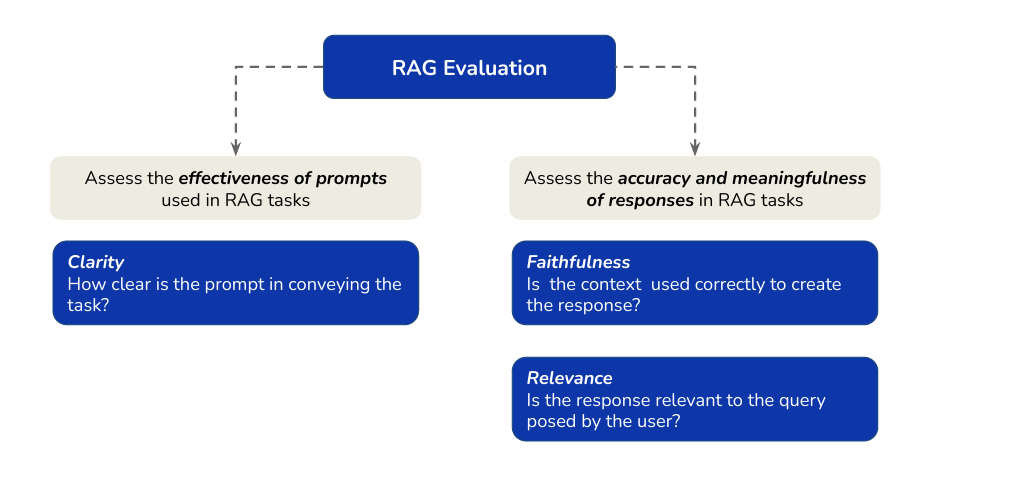

### Defining the Evaluation Prompts

In [ ]:
groundedness_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
The answer should be derived only from the information presented in the context

Instructions:
1. First write down the steps that are needed to evaluate the answer as per the metric.
2. Give a step-by-step explanation if the answer adheres to the metric considering the question and context as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the answer using the evaluaton criteria and assign a score.
"""

In [ ]:
relevance_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
Relevance measures how well the answer addresses the main aspects of the question, based on the context.
Consider whether all and only the important aspects are contained in the answer when evaluating relevance.

Instructions:
1. First write down the steps that are needed to evaluate the context as per the metric.
2. Give a step-by-step explanation if the context adheres to the metric considering the question as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the context using the evaluaton criteria and assign a score.
"""

In [ ]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

### Defining the Evaluation Function

In [ ]:
def generate_ground_relevance_response(user_input,k=1,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: Who are the authors of this article and who published this article ?

In [ ]:
user_input = "Who are the authors of this article and who published this article ?"
ground,rel = generate_ground_relevance_response(user_input,max_tokens=350)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the key information in the context related to the question.
2. Check if the answer is derived only from the identified information.
3. Compare each element of the answer with the corresponding information in the context.

Explanation:
The question asks for the authors and publisher of the article. The context provides the names of the authors (Morten T. Hansen and Joel M. Podolny) and the name of the publisher (Harvard Business Review). The answer matches exactly with the information in the context, so it is derived only from the context.

Evaluation:
The metric is followed completely as the answer is derived solely from the context without any additional or incorrect information.

Rating:
Based on the evaluation criteria, I would rate this answer a 5 (The metric is followed completely).

 Steps to evaluate context as per relevance metric:
1. Identify the main aspects of the question from the question itself. In this case, the main aspects are

- It got a perfect score because the response is both grounded in the context and relevant to the query.  
- This means that both the retrieval and augmentation parts are good.
### Query 2: List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines.

In [ ]:
user_input_2 = "List down the three leadership characteristics in bulleted points and explain each one of the characteristics under two lines."
ground,rel = generate_ground_relevance_response(user_input_2,max_tokens=500)
print(ground,end="\n\n")
print(rel)

ValueError: Requested tokens (1860) exceed context window of 1024

- The groundedness score is 5 since the response is derived solely from the context.  

- Regarding relevance, the score is 4 (the metric is mostly followed). However, it is not very clear why this rating was given.  

- One solution is to modify the relevance prompt to instruct the model to provide reasons for any point deductions or increase the max_tokens (assuming the output has been truncated)

In [ ]:
user_input_3 = "Can you explain specific examples from the article where Apple's approach to leadership has led to successful innovations?"
ground,rel = generate_ground_relevance_response(user_input_3,max_tokens=500)

print(ground,end="\n\n")
print(rel)

- For relevance, the response includes both the score and the reason for the point deduction.  

- For groundedness, it is unclear why one point was deducted.
# Business Insights and Recommendations
- Vector database creation time increases with the number of pages in the PDF document.
- Retrieval parameter **`k`** is critical as the answer can be spread across multiple contexts.
- **`chunk_overlap`** ensures coherence, especially when context spans across chunks.
- **`max_tokens`** depends on query complexity; higher values yield detailed responses, while simple queries result in concise outputs despite large token limits due to prompt design and zero **`temperature`**.
- Refine prompt design and temperature settings to control response length and creativity.
- Continuously adjust RAG parameters based on specific use cases for optimal performance.
- Prioritize groundedness and relevance in evaluations to ensure reliable and contextually accurate outputs.
- Establish a feedback loop to fine-tune parameters, improving performance for diverse query types.